# ST2195 Programming for Data Science Coursework Part 1

This Jupyter Notebook - Python analysis involves implementing the random walk Metropolis algorithm, a Markov Chain Monte Carlo (MCMC) technique, to produce a sequence of random numbers drawn from a specified probability density function.

#### (a) Random Walk Metropolis Algorithm

In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
#Establish probability density function (PDF), f(x)
def pdf_f(x):
    return 0.5 * np.exp(-np.abs(x))

In [3]:
#Log of the PDF
def log_f(x):
    return np.log(0.5) - np.abs(x)

In [4]:
#Calibrate variables
N = 10000
s = 1

In [5]:
#Execute the Random Walk Metropolis 
def RWM(N, s):
    samplesx = np.zeros(N)
    samplesx[0] = np.random.normal(0, s)

    for i in range(1, N):
        xalpha = np.random.normal(loc=samplesx[i-1], scale=s)
        ratio = pdf_f(xalpha) / pdf_f(samplesx[i-1])
        uni = np.random.uniform(0, 1)

        if np.log(uni) < np.log(ratio):
            samplesx[i] = xalpha  #Accept the proposed sample
        else:
            samplesx[i] = samplesx[i-1]  #Reject and keep the current sample

    return samplesx

In [6]:
#Run the Random Walk Metropolis algorithm
samplesx = RWM(N, s)

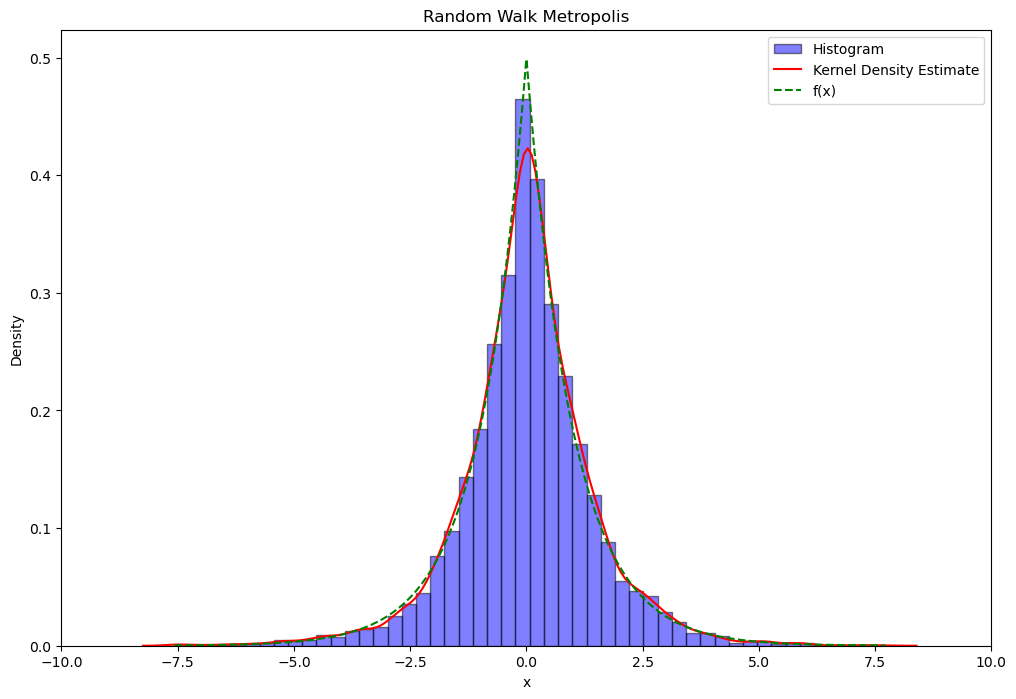

In [7]:
#Plot the histogram
plt.figure(figsize=(12, 8))
plt.hist(samplesx, bins=50, density=True, alpha=0.5, color='blue', edgecolor='black', label='Histogram')
plt.title('Random Walk Metropolis')
plt.xlabel('x')
plt.ylabel('Density')

#Visualise the kernel density estimate
sns.kdeplot(samplesx, color='red', label='Kernel Density Estimate')

#Visualise f(x)
x = np.linspace(min(samplesx), max(samplesx), 1000)
plt.plot(x, pdf_f(x), 'g--', label='f(x)')

plt.legend()
plt.xlim(-10, 10)
plt.show()

In [8]:
#Compute sample mean and sample standard deviation
s_mean = np.mean(samplesx)
s_std = np.std(samplesx)

In [9]:
#Print sample mean and sample standard deviation
print(f"Sample Mean: {s_mean}")
print(f"Sample Standard Deviation: {s_std}")

Sample Mean: 0.015789757601416224
Sample Standard Deviation: 1.4150648553068725


#### (b) $\hat{R}$ value

In [10]:
#Define a procedure to generate chains
def chain_generate(N, J, s):
    chain = []
    for j in range(J):
        x0_j = np.random.uniform()  #Initial value for chain j
        j_chain = [x0_j] * (N + 1)  #Initialise the chain with the initial value
        for i in range(2, N + 2):
            xbeta = j_chain[i - 1] + np.random.normal(0, s)  #Define Random Walk Metropolis
            j_chain.append(xbeta)
        chain.append(j_chain)
    return chain

In [11]:
#Establish and compute Mj as 
def s_mean(chain):
    Mj = [np.mean(chain) for chain in chain]
    return Mj

#Establish and compute Vj as
def w_s_var(chain, Mj):
    Vj = [np.var(chain) for chain in chain]
    return Vj

#Establish and compute W as
def ow_s_var(Vj):
    W = np.mean(Vj)
    return W

#Establish and compute M as
def o_s_mean(Mj):
    M = np.mean(Mj)
    return M

#Establish and compute B as
def b_s_var(Mj, M):
    B = N / (J - 1) * sum((np.array(Mj) - M)**2)
    return B

#Establish a procedure to calculate R-hat
def R_hat_calculation(B, W):
    Rnumber = np.sqrt((W + B) / W)
    return Rnumber

In [12]:
#Define variables
N = 2000
J = 4
s_value = np.linspace(0.001, 1, num=100)
valueR_hat = np.zeros(len(s_value))

In [13]:
#Compute the R-hat statistic for each value of s
for i, s in enumerate(s_value):
    chain = chain_generate(N, J, s)
    Mj = s_mean(chain)
    M = o_s_mean(Mj)
    Vj = w_s_var(chain, Mj)
    W = ow_s_var(Vj)
    B = b_s_var(Mj, M)
    valueR_hat[i] = R_hat_calculation(B, W)

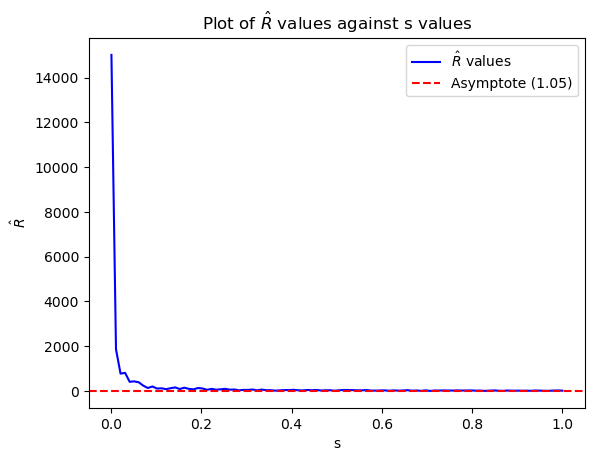

In [14]:
#Map R-hat values against s value
plt.plot(s_value, valueR_hat, color="blue")
plt.xlabel("s")
plt.ylabel(r"$\hat{R}$")
plt.title(r"Plot of $\hat{R}$ values against s values")
plt.axhline(y=1.05, color="red", linestyle="--")
plt.legend([r"$\hat{R}$ values", "Asymptote (1.05)"], loc="upper right")
plt.show()